# Project Three: 911 Dispatch
By [Anon Silpavuthi](http://www.linkedin.com/in/anon-silpavuthi-83001bb1) 

This is a project to predict the total numbers of 911 dispatch between 2011-2014 and compare these data to the year before to see whether there is a correlation.

 

## Data Cleaning

I cleaned this [911 Dispatch data](https://data.boston.gov/dataset/17129fad-fff9-4eac-ad74-51fb4bf63c22/resource/2459542e-7026-48e2-9128-ca29dd3bebf8/download/911-daily-dispatch-count-by-agency.csv). I downloaded this data from [Analyze Boston](https://data.boston.gov/), a data hub of the City of Boston. The Dataset includes date, year, month, day of year and the amount of calls in total and separated by the Boston Police Department, Boston Fire Department, and Emergency Medical Services.

You can see the process of the Data cleaning with short descriptions below.



In [80]:
import os
try:
    inputFunc = raw_input
except NameError:
    inputFunc = input

import pandas as pd
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
import numpy as np
 
import seaborn as sns
from statsmodels.formula.api import ols

from sklearn import linear_model
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from patsy import dmatrices

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

import random



# Custom functions

def evaluate(pred, labels_test):
    acc = accuracy_score(pred, labels_test)
    print ("Accuracey: %s"%acc)
    tn, fp, fn, tp = confusion_matrix(labels_test, pred).ravel()

    recall = tp / (tp + fp)
    percision = tp / (tp + fn)
    f1 = (2 / ((1/recall)+(1/percision)))

    print ("")
    print ("True Negatives: %s"%tn)
    print ("False Positives: %s"%fp)
    print ("False Negatives: %s"%fn)
    print ("True Positives: %s"%tp)
    print ("Recall: %s"%recall)
    print ("Precision: %s"%percision)
    print ("F1 Score: %s"%f1)

def plot_bound(Z_val,data,col1,col2,binary):
    # Z-val equals "Yes" value. E.g., "Y" or "1". 
    # data equals df
    # col1 and col2 defines which colums to use from data
    # Plot binary decision boundary. 
    # For this, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    
    x_min = float(data.iloc[:,[col1]].min())-float(data.iloc[:,[col1]].min())*0.10 
    x_max = float(data.iloc[:,[col1]].max()+float(data.iloc[:,[col1]].min())*0.10)
    y_min = 0.0; 
    y_max = float(training.iloc[:,[col2]].max())+float(training.iloc[:,[col2]].max())*0.10
    h_x = (x_max-x_min)/100  # step size in the mesh
    h_y = (y_max-y_min)/100  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h_x), np.arange(y_min, y_max, h_y))
    if binary == 1:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])   
        Z = np.where(Z=="Y",1,0)
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.pcolormesh(xx, yy, Z)
    plt.show()

In [81]:
 raw_data_df = pd.read_csv('911.csv') 
raw_data_df.head()

,Year,Month,Total,BPD,BFD,EMS
0,2010,11,2603,1969,259,375
1,2010,11,2414,1852,206,356
2,2010,11,2487,1872,235,380
3,2010,11,2328,1695,241,392
4,2010,11,2478,1915,225,338


I ran the following code to see the total number of rows of data.

In [82]:

print("Size of entire table: %s "%len(raw_data_df))


Size of entire table: 1268 


In [83]:
# This is the step that I take just to make sure all of your columns are stored as numbers.
raw_data_df = raw_data_df.apply(pd.to_numeric, errors='coerce')
# errors='coerce' will set things that can't be converted to numbers to NaN
# so you'll want to drop these like so.
raw_data_df = raw_data_df.dropna()
raw_data_df.head()

,Year,Month,Total,BPD,BFD,EMS
0,2010,11,2603,1969,259,375
1,2010,11,2414,1852,206,356
2,2010,11,2487,1872,235,380
3,2010,11,2328,1695,241,392
4,2010,11,2478,1915,225,338


I then made a loop to clean the data. 
The loop combines all the total calls of each month instead of having all the day of year. Because there are some missing data (2010 starts with November and 2014 ends with April), I set up the loop so that it starts on November of 2011 and ends on April of 2014.

In [84]:
df = pd.DataFrame()
n = 0
for j in range(2010,2015):
    for i in range(1,13):
         if (j == 2011 and i >= 11) or (j > 2011 and j < 2014) or (j == 2014 and i <= 4):
            data = pd.DataFrame([[
                                  i  ,
                                  raw_data_df[(raw_data_df["Year"]==j) & (raw_data_df["Month"]==i)]["Total"].sum(),
                                  raw_data_df[(raw_data_df["Year"]==j-1) & (raw_data_df["Month"]==i)]["Total"].sum(),
                                 ]],index=[n],columns=['Month','Total','Total_last_year'])
            df = df.append(data)
            n = n + 1

In [85]:
df

,Month,Total,Total_last_year
0,11,75215,69616
1,12,75360,68439
2,1,79309,72976
3,2,75746,68199
4,3,86160,75770
5,4,86512,73758
6,5,91985,81477
7,6,90120,78878
8,7,92775,84440
9,8,90869,82678


I then used the following codes in order to create a new table with just 2 variables:
1. Total 
2. Total of last year

The purpose of this is to be able to see the correlation between the current total of dispatch that we are looking at and the total of dispatch last year as you can see in the graph below.

In [86]:

dispatch_lin_df = df[[
                               'Total', 
                               'Total_last_year'
                               ]].copy()
dispatch_lin_df

,Total,Total_last_year
0,75215,69616
1,75360,68439
2,79309,72976
3,75746,68199
4,86160,75770
5,86512,73758
6,91985,81477
7,90120,78878
8,92775,84440
9,90869,82678


## Analysis

As you can see in the result below. R squared is around 29% and Accuracy is around 62%. 

This result shows that the model explains low of the variability of the response data around its mean and therefore, show that this is not an accurate representation of the correlation between the two feature variables. However, a low R-squared does not necessarily indicate that the model is bad because R-squared cannot determine whether the coefficient estimates and predictions are biased. The 911 dispatch data involves human behaviors which are simply hard to predict.

Consequently, although we can see some correlation from this dataset, I do have to agree with the result that it is not an accurate representation of the correlation between the two feature variables. A different set of data and a different data sample size will likely demonstrate a better correlation and prediction. 




## Taining and Validation: dispatch_lin_df



In [87]:
data = dispatch_lin_df
holdout = data.sample(frac=0.3)
training = data.loc[~data.index.isin(holdout.index)]

In [88]:
training

,Total,Total_last_year
0,75215,69616
1,75360,68439
2,79309,72976
3,75746,68199
4,86160,75770
8,92775,84440
9,90869,82678
11,91572,82139
12,82013,75215
13,83461,75360


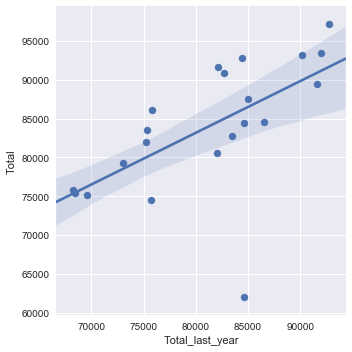

In [89]:
sns.lmplot(x="Total_last_year", y="Total", data=training, x_estimator=np.mean, order=1)

In [90]:
model = ols("Total ~ Total_last_year", training).fit()
#model = ols("Total ~ Month + np.power(Month, 2)", training).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Total   R-squared:                       0.372
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     11.26
Date:                Mon, 04 Dec 2017   Prob (F-statistic):            0.00332
Time:                        22:49:47   Log-Likelihood:                -214.14
No. Observations:                  21   AIC:                             432.3
Df Residuals:                      19   BIC:                             434.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.997e+04   1.61e+04      1.856      0.079   -3818.177    6.38e+04
Total_last_year     0.6650      0.198      3.356      0.003       0.250       1.080
==============================================================================
Omnibus:                       28.619   Durbin-Watson:                   1.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.875
Skew:                          -2.310   Prob(JB):                     7.36e-13
Kurtosis:                       9.521   Cond. No.                     8.83e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.83e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [79]:
# Rerun with SciKitLearn because it's easy to check accuracy
features_train = training.drop("Total", axis=1).as_matrix(columns=None)
labels_train = training["Total"].as_matrix(columns=None)

features_test = holdout.drop("Total", axis=1).as_matrix(columns=None)
labels_test = holdout["Total"].as_matrix(columns=None)

lm = linear_model.LinearRegression()
clf = lm.fit(features_train, labels_train)
pred = clf.predict(features_test)
accuracy = metrics.r2_score(labels_test, pred)
print("R squared:",lm.score(features_train,labels_train))
print("Accuracy:",accuracy)

R squared: 0.289745547751
Accuracy: 0.621308745336
